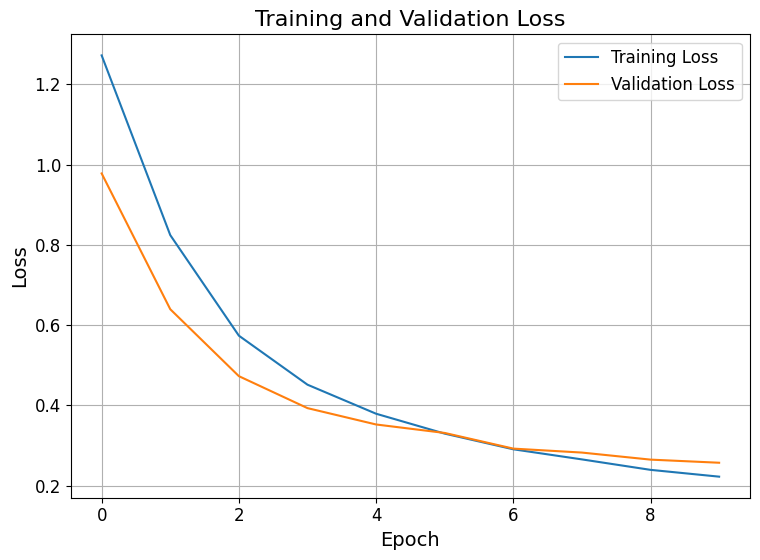

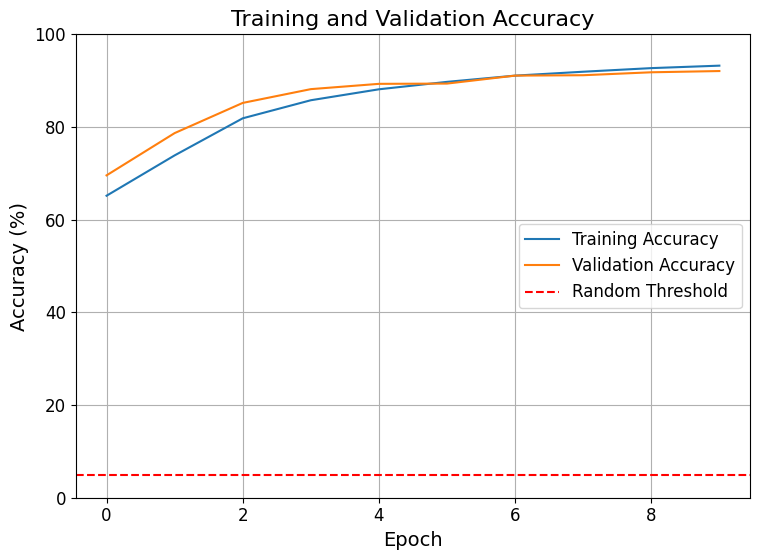

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams.update({'font.size': 20,
                     'axes.titlesize': 16,
                     'axes.labelsize': 14,
                     'xtick.labelsize': 12,
                     'ytick.labelsize': 12,
                     'legend.fontsize': 12})

df = pd.read_csv('../results/CNN/training_stats_CNN_slc3.csv')

train_losses = df['train_loss'].tolist()
val_losses = df['val_loss'].tolist()
train_accuracies = df['train_accuracy'].tolist()
val_accuracies = df['val_accuracy'].tolist()


# Figure 1: Loss curves
plt.figure(figsize=(8, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Figure 2: Accuracy curves
plt.figure(figsize=(8, 6))
plt.plot([acc for acc in train_accuracies], label='Training Accuracy')
plt.plot([acc for acc in val_accuracies], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy')
plt.ylim(0, 100)
plt.axhline(y=5, color='r', linestyle='--', label='Random Threshold')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Mean accuracy: 92.08 ± 0.36%
Mean balanced accuracy: 85.28 ± 1.71%


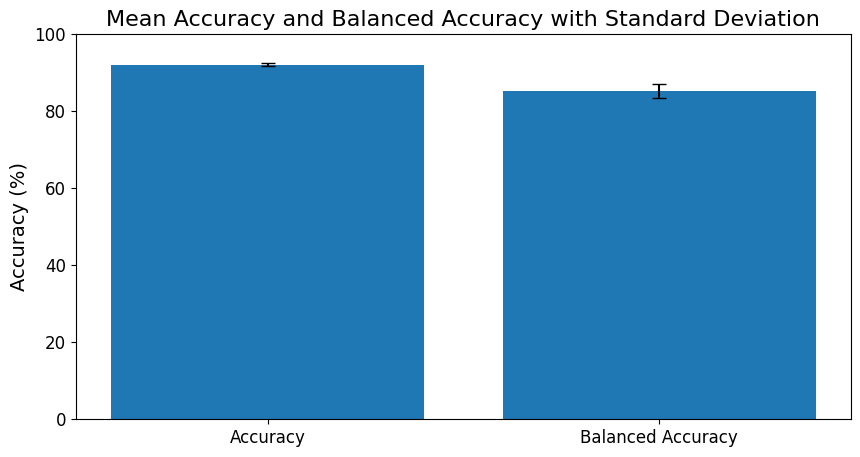

In [12]:
accuracies = []
balanced_accuracies = []
for i in range(2,5):
    df = pd.read_csv(f'../results/CNN/training_stats_CNN_slc{i}.csv')
    accuracies.append(df['test_accuracy'].tolist()[-1])
    balanced_accuracies.append(df['test_balanced_accuracy'].tolist()[-1])

# convert to numpy arrays for easier manipulation
import numpy as np
accuracies = np.array(accuracies)
balanced_accuracies = np.array(balanced_accuracies)

# Calculate mean and std for accuracies
mean_accuracy = np.mean(accuracies, axis=0)
std_accuracy = np.std(accuracies, axis=0)
mean_balanced_accuracy = np.mean(balanced_accuracies, axis=0)
std_balanced_accuracy = np.std(balanced_accuracies, axis=0)

print(f"Mean accuracy: {mean_accuracy:.2f} ± {std_accuracy:.2f}%")
print(f"Mean balanced accuracy: {mean_balanced_accuracy:.2f} ± {std_balanced_accuracy:.2f}%")

# Plotting the accuracies
plt.figure(figsize=(10, 5))
plt.bar(['Accuracy', 'Balanced Accuracy'], [mean_accuracy, mean_balanced_accuracy], yerr=[std_accuracy, std_balanced_accuracy], capsize=5)
plt.ylabel('Accuracy (%)')
plt.title('Mean Accuracy and Balanced Accuracy with Standard Deviation')
plt.ylim(0, 100)
plt.show()